In [1]:
from dotenv import dotenv_values
import sqlalchemy
import pandas as pd
import sql_functions as sf
import matplotlib.pyplot as plt

In [2]:
schema = 'capstone_wildfire'
engine = sf.get_engine()
sql_query = f'select * from {schema}.fires_data_v1_rdy_to_clean_rows;'

In [3]:
wild_fire_df = sf.get_dataframe(sql_query)

In [4]:
wild_fire_df

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,county,shape_hex,combined_control_date,combined_discovery_date,burning_time,state_name
0,19961252,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,12.0,C,35.590000,-86.820000,Marshall,\x0001ad10000010ae47e17ab455c0f051b81e85cb4140...,2005-08-24 18:00:00,2005-08-24 15:30:00,0.0,Tennessee
1,19961253,Tennessee Division of Forestry,undefined,undefined,1,Lightning,0.5,B,35.376667,-87.600000,Wayne,\x0001ad1000006466666666e655c008ff4a9d36b04140...,2005-08-02 17:00:00,2005-08-02 15:45:00,0.0,Tennessee
2,19961254,Tennessee Division of Forestry,undefined,undefined,10,Fireworks,0.1,A,35.096667,-86.480000,Lincoln,\x0001ad1000001c85eb51b89e55c0688e0d935f8c4140...,2005-09-04 18:30:00,2005-09-04 17:15:00,0.0,Tennessee
3,19961255,Tennessee Division of Forestry,undefined,undefined,3,Smoking,8.0,B,35.145000,-86.663333,Lincoln,\x0001ad1000004076830d74aa55c0c8f5285c8f924140...,2005-09-11 16:45:00,2005-09-11 15:20:00,0.0,Tennessee
4,19961257,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,2.0,B,35.156667,-86.500000,Lincoln,\x0001ad100000fcffffffff9f55c0b06f88a70d944140...,2005-09-05 14:00:00,2005-09-05 00:00:00,0.0,Tennessee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674433,19961247,Tennessee Division of Forestry,undefined,undefined,8,Children,0.5,B,35.036667,-87.368333,Lawrence,\x0001ad100000c461d5c592d755c020ad927eb1844140...,2005-07-05 17:10:00,2005-07-05 15:00:00,0.0,Tennessee
1674434,19961248,Tennessee Division of Forestry,undefined,undefined,7,Arson,20.0,C,35.120000,-88.265000,Hardin,\x0001ad100000285c8fc2f51056c098c2f5285c8f4140...,2005-08-11 19:00:00,2005-08-11 18:00:00,0.0,Tennessee
1674435,19961249,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,2.0,B,35.176667,-87.348333,Lawrence,\x0001ad100000e4e6c0174bd655c07065b1039d964140...,2005-08-22 16:30:00,2005-08-22 15:30:00,0.0,Tennessee
1674436,19961250,Tennessee Division of Forestry,undefined,undefined,12,Structure,0.1,A,35.820000,-87.633333,Hickman,\x0001ad100000ecbd648888e855c0305c8fc2f5e84140...,2005-08-20 19:10:00,2005-08-20 16:20:00,0.0,Tennessee


In [21]:
# Speichern der DF über Restart-Ladezeiten zu vermeiden
wild_fire_df.to_csv('wild_fire_df.csv', index=False)

In [2]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
wild_fire_df = pd.read_csv('wild_fire_df.csv')


In [3]:
wild_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674438 entries, 0 to 1674437
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   unique_id                   1674438 non-null  int64  
 1   source_reporting_unit_name  1674438 non-null  object 
 2   gov_firecode                1674350 non-null  object 
 3   fire_name                   1671149 non-null  object 
 4   cause_code                  1674438 non-null  int64  
 5   cause_descr                 1674438 non-null  object 
 6   fire_size                   1674438 non-null  float64
 7   fire_size_class             1674438 non-null  object 
 8   latitude                    1674438 non-null  float64
 9   longitude                   1674438 non-null  float64
 10  county                      1674438 non-null  object 
 11  shape_hex                   1674438 non-null  object 
 12  combined_control_date       857804 non-null   object 
 1

In [4]:
wild_fire_df['combined_control_date'] = pd.to_datetime(wild_fire_df['combined_control_date'])
wild_fire_df['combined_discovery_date'] = pd.to_datetime(wild_fire_df['combined_discovery_date'])

California fire count change from 1995.0 to 2015.0: 13.41%


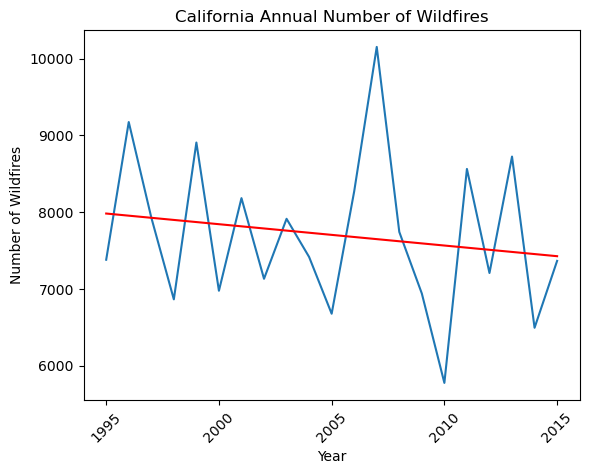

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'California']

# Group by year and count number of fires  
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['unique_id'].count().reset_index(name='fire_count')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_count'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'])

# Add trendline
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r-")

plt.title('California Annual Number of Wildfires')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')

# Set x-axis labels at 5-year intervals  
x_ticks = np.arange(fires_per_year['combined_discovery_date'].min(), fires_per_year['combined_discovery_date'].max() + 1, 5)
ax = plt.gca()
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45)

# Print analysis
print(f"California fire count change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

Oregon fire count change from 1995.0 to 2015.0: -17.95%


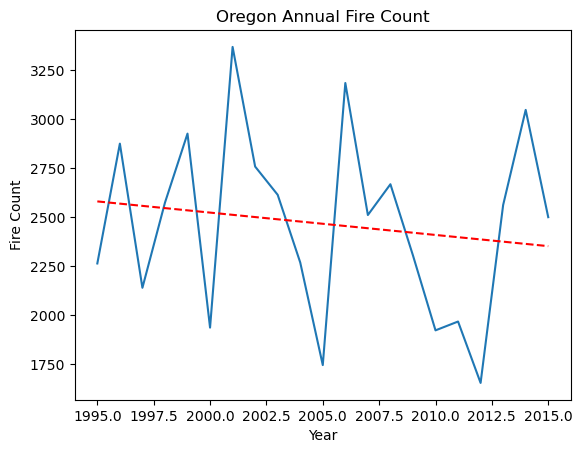

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Oregon']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['unique_id'].count().reset_index(name='fire_count')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_count'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Oregon Annual Fire Count')
plt.xlabel('Year')
plt.ylabel('Fire Count') 

# Print analysis
print(f"Oregon fire count change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

New Mexico fire count change from 1995.0 to 2015.0: -12.88%


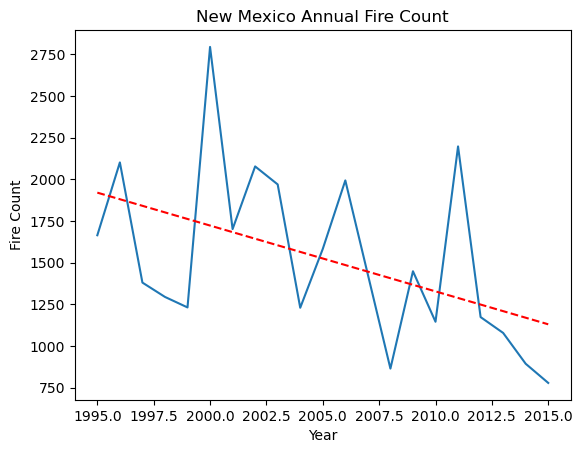

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'New Mexico']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['unique_id'].count().reset_index(name='fire_count')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_count'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('New Mexico Annual Fire Count')
plt.xlabel('Year')
plt.ylabel('Fire Count') 

# Print analysis
print(f"New Mexico fire count change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

Idaho fire count change from 1995.0 to 2015.0: 5.1%


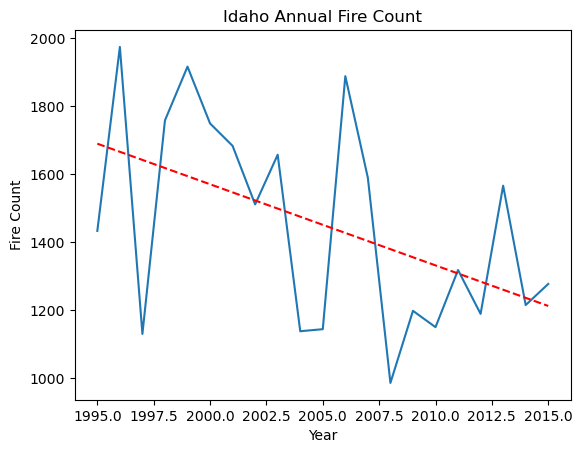

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Idaho']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['unique_id'].count().reset_index(name='fire_count')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_count'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Idaho Annual Fire Count')
plt.xlabel('Year')
plt.ylabel('Fire Count') 

# Print analysis
print(f"Idaho fire count change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

Arizona fire count change from 1995.0 to 2015.0: 35.04%


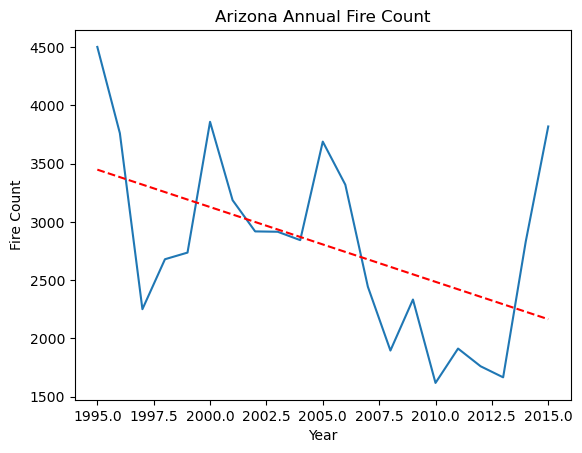

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Arizona']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['unique_id'].count().reset_index(name='fire_count')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_count'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_count'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Arizona Annual Fire Count')
plt.xlabel('Year')
plt.ylabel('Fire Count') 

# Print analysis
print(f"Arizona fire count change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

In [10]:
fires_per_year['pct_change']

0          NaN
1    -0.164594
2    -0.401755
3     0.190667
4     0.021277
5     0.410453
6    -0.174398
7    -0.084118
8    -0.001028
9    -0.024700
10    0.297573
11   -0.100298
12   -0.263935
13   -0.224314
14    0.231135
15   -0.306901
16    0.182437
17   -0.079498
18   -0.053977
19    0.698498
20    0.350424
Name: pct_change, dtype: float64

Arizona fire size change from 1995.0 to 2015.0: -23.31%


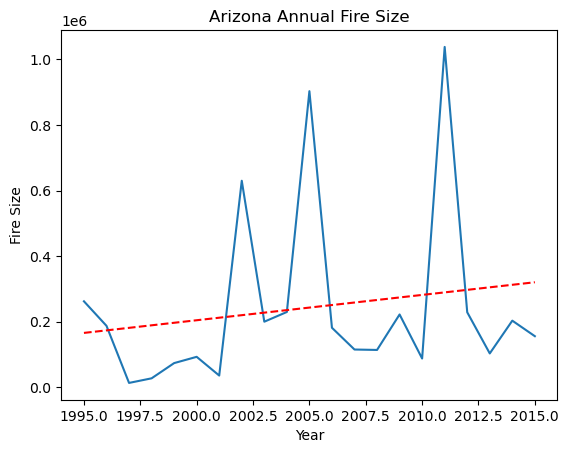

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Arizona']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['fire_size'].sum().reset_index(name='fire_size')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_size'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Arizona Annual Fire Size')
plt.xlabel('Year')
plt.ylabel('Fire Size') 

# Print analysis
print(f"Arizona fire size change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

California fire size change from 1995.0 to 2015.0: 55.2%


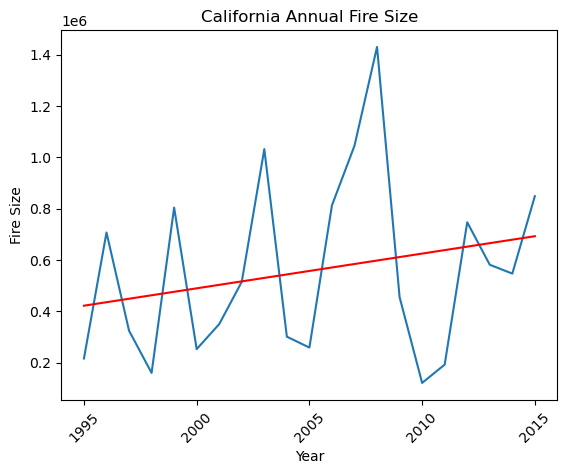

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'California']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['fire_size'].sum().reset_index(name='fire_size')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_size'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r-")

# Set x-axis labels at 5-year intervals  
x_ticks = np.arange(fires_per_year['combined_discovery_date'].min(), fires_per_year['combined_discovery_date'].max() + 1, 5)
ax = plt.gca()
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45)

plt.title('California Annual Fire Size')
plt.xlabel('Year')
plt.ylabel('Fire Size') 

# Print analysis
print(f"California fire size change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

Idaho fire size change from 1995.0 to 2015.0: 297.72%


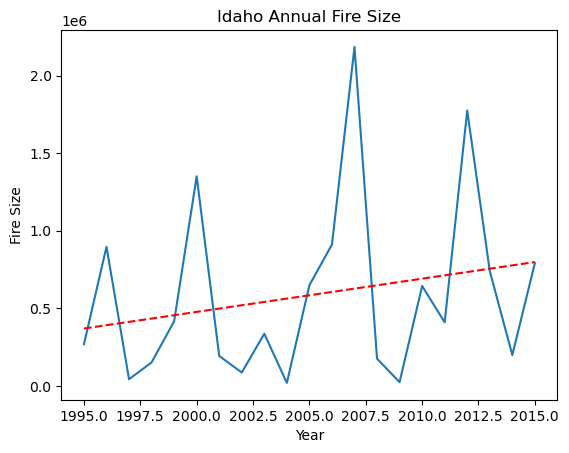

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Idaho']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['fire_size'].sum().reset_index(name='fire_size')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_size'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Idaho Annual Fire Size')
plt.xlabel('Year')
plt.ylabel('Fire Size') 

# Print analysis
print(f"Idaho fire size change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

New Mexico fire size change from 1995.0 to 2015.0: 18.53%


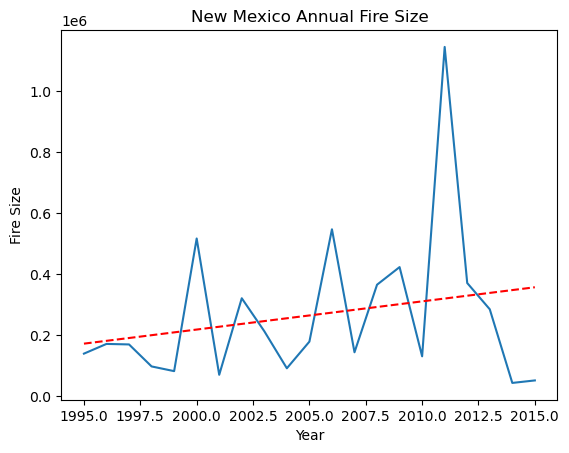

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'New Mexico']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['fire_size'].sum().reset_index(name='fire_size')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_size'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('New Mexico Annual Fire Size')
plt.xlabel('Year')
plt.ylabel('Fire Size') 

# Print analysis
print(f"New Mexico fire size change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

Oregon fire size change from 1995.0 to 2015.0: -38.0%


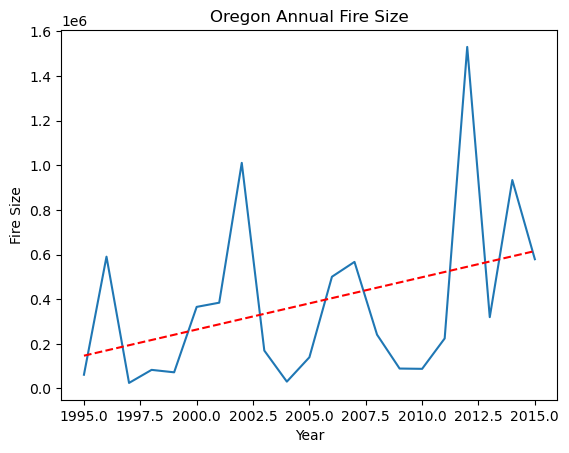

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter to just California 
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Oregon']

# Group by year and count number of fires
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year)['fire_size'].sum().reset_index(name='fire_size')

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['fire_size'].pct_change()

# Plot fire count per year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'])

# Add trendline  
z = np.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['fire_size'], 1)
p = np.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Oregon Annual Fire Size')
plt.xlabel('Year')
plt.ylabel('Fire Size') 

# Print analysis
print(f"Oregon fire size change from {fires_per_year.iloc[0]['combined_discovery_date']} to {fires_per_year.iloc[-1]['combined_discovery_date']}: {round(fires_per_year['pct_change'].iloc[-1]*100, 2)}%")

California average burn time per fire change: 79.0%


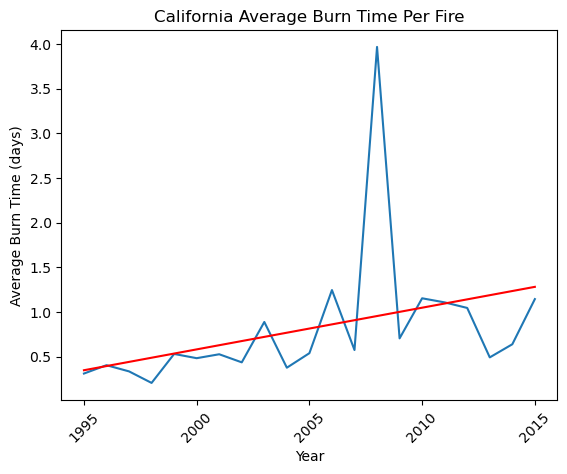

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Filter to California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'California'] 

# Group by year and calculate avg burn time per fire 
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year).agg(
    fire_count=('unique_id', 'count'),
    total_burn_time=('burning_time', lambda x: x[x.notnull()].sum()),
    avg_burn_time=('burning_time', lambda x: x[x.notnull()].mean())
).reset_index()

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['avg_burn_time'].pct_change()

# Plot average burn time per fire each year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'])

# Add trendline
z = numpy.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'], 1)
p = numpy.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r-")

# Set x-axis labels at 5-year intervals  
x_ticks = np.arange(fires_per_year['combined_discovery_date'].min(), fires_per_year['combined_discovery_date'].max() + 1, 5)
ax = plt.gca()
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45)

plt.title('California Average Burn Time Per Fire')
plt.xlabel('Year')
plt.ylabel('Average Burn Time (days)')

print(f"California average burn time per fire change: {round(fires_per_year['pct_change'].iloc[-1]*100,1)}%")

New Mexico average burn time per fire change: -16.2%


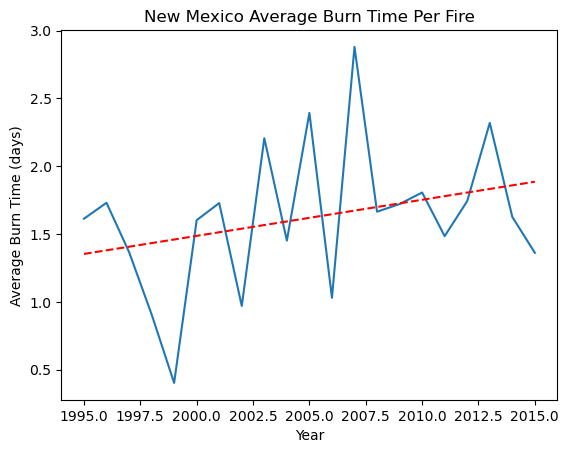

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Filter to California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'New Mexico'] 

# Group by year and calculate avg burn time per fire 
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year).agg(
    fire_count=('unique_id', 'count'),
    total_burn_time=('burning_time', lambda x: x[x.notnull()].sum()),
    avg_burn_time=('burning_time', lambda x: x[x.notnull()].mean())
).reset_index()

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['avg_burn_time'].pct_change()

# Plot average burn time per fire each year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'])

# Add trendline
z = numpy.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'], 1)
p = numpy.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('New Mexico Average Burn Time Per Fire')
plt.xlabel('Year')
plt.ylabel('Average Burn Time (days)')

print(f"New Mexico average burn time per fire change: {round(fires_per_year['pct_change'].iloc[-1]*100,1)}%")

Idaho average burn time per fire change: 18.8%


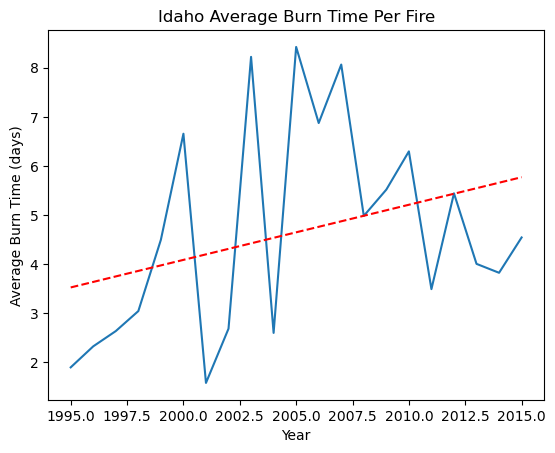

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Filter to California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Idaho'] 

# Group by year and calculate avg burn time per fire 
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year).agg(
    fire_count=('unique_id', 'count'),
    total_burn_time=('burning_time', lambda x: x[x.notnull()].sum()),
    avg_burn_time=('burning_time', lambda x: x[x.notnull()].mean())
).reset_index()

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['avg_burn_time'].pct_change()

# Plot average burn time per fire each year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'])

# Add trendline
z = numpy.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'], 1)
p = numpy.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Idaho Average Burn Time Per Fire')
plt.xlabel('Year')
plt.ylabel('Average Burn Time (days)')

print(f"Idaho average burn time per fire change: {round(fires_per_year['pct_change'].iloc[-1]*100,1)}%")

Arizona average burn time per fire change: -38.8%


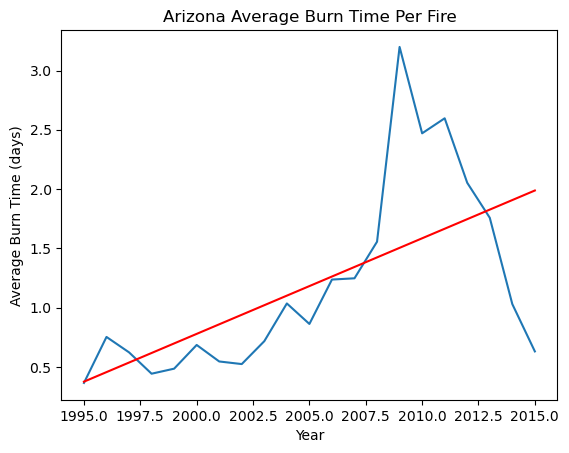

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Filter to California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Arizona'] 

# Group by year and calculate avg burn time per fire 
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year).agg(
    fire_count=('unique_id', 'count'),
    total_burn_time=('burning_time', lambda x: x[x.notnull()].sum()),
    avg_burn_time=('burning_time', lambda x: x[x.notnull()].mean())
).reset_index()

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['avg_burn_time'].pct_change()

# Plot average burn time per fire each year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'])

# Add trendline
z = numpy.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'], 1)
p = numpy.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r-")

plt.title('Arizona Average Burn Time Per Fire')
plt.xlabel('Year')
plt.ylabel('Average Burn Time (days)')

print(f"Arizona average burn time per fire change: {round(fires_per_year['pct_change'].iloc[-1]*100,1)}%")

Oregon average burn time per fire change: -53.5%


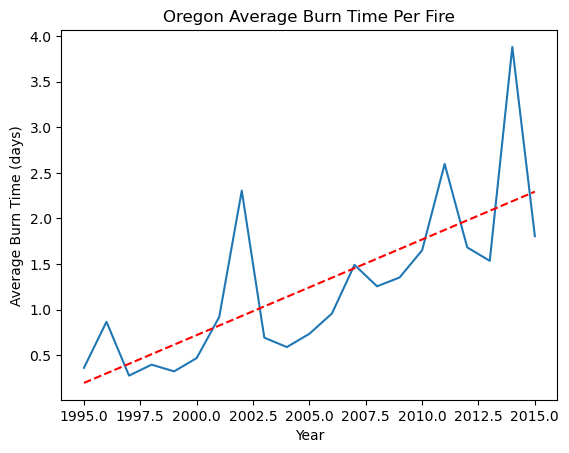

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Filter to California
ca_data = wild_fire_df[wild_fire_df['state_name'] == 'Oregon'] 

# Group by year and calculate avg burn time per fire 
fires_per_year = ca_data.groupby(ca_data['combined_discovery_date'].dt.year).agg(
    fire_count=('unique_id', 'count'),
    total_burn_time=('burning_time', lambda x: x[x.notnull()].sum()),
    avg_burn_time=('burning_time', lambda x: x[x.notnull()].mean())
).reset_index()

# Calculate percentage change each year
fires_per_year['pct_change'] = fires_per_year['avg_burn_time'].pct_change()

# Plot average burn time per fire each year
plt.plot(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'])

# Add trendline
z = numpy.polyfit(fires_per_year['combined_discovery_date'], fires_per_year['avg_burn_time'], 1)
p = numpy.poly1d(z)
plt.plot(fires_per_year['combined_discovery_date'],p(fires_per_year['combined_discovery_date']),"r--")

plt.title('Oregon Average Burn Time Per Fire')
plt.xlabel('Year')
plt.ylabel('Average Burn Time (days)')

print(f"Oregon average burn time per fire change: {round(fires_per_year['pct_change'].iloc[-1]*100,1)}%")